In [1]:
#load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

In [2]:
# Set work data Type
T = BigFloat
setprecision(128)
;

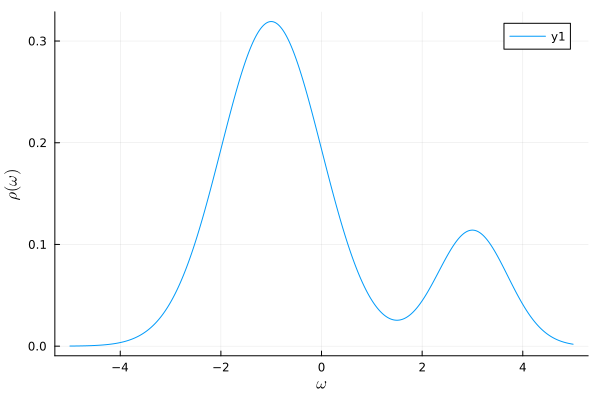

In [3]:
#define spectral function
#gaussian(x, mu, sigma) = exp(-((x-mu)/sigma)^2)/(sqrt(π)*sigma)
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
rho(omega) = 0.8*gaussian(omega, -1.0, 1.0) + 0.2*gaussian(omega, 3, 0.7)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
#construct solver struct
@time sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
;

N_imag is setted as 31
H=1
Iter     Function value   Gradient norm 
     0     9.050531e-01     5.094001e+00
 * time: 0.015012979507446289
     1     8.152167e-01     3.982333e+00
 * time: 1.30867600440979
     2     4.035779e-01     5.450129e+00
 * time: 1.5513930320739746
     3     1.910854e-01     2.158235e+00
 * time: 1.7627239227294922
     4     1.565320e-01     2.165017e-01
 * time: 1.9431250095367432
     5     1.561898e-01     1.834678e-02
 * time: 2.221083879470825
     6     1.561841e-01     4.391178e-03
 * time: 2.4725148677825928
     7     1.561839e-01     1.240366e-03
 * time: 2.6789989471435547
     8     1.561839e-01     3.309993e-04
 * time: 2.806907892227173
     9     1.561839e-01     3.492742e-05
 * time: 2.938533067703247
    10     1.561839e-01     5.151171e-06
 * time: 3.140220880508423
    11     1.561839e-01     1.124102e-06
 * time: 3.343935012817383
    12     1.561839e-01     2.750608e-07
 * time: 3.5560879707336426
    13     1.561839e-01     2.953443e-08

In [8]:
#execute optimize
@time Nevanlinna.solve!(sol)

H=1
Iter     Function value   Gradient norm 
     0     1.561839e-01     6.243122e-09
 * time: 0.0002281665802001953
max_theta=0.1628134357327177670612707285767895569134
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     1.561839e-01     1.233090e+00
 * time: 0.00020503997802734375
     1     1.498561e-01     8.958772e-01
 * time: 0.15527701377868652
     2     1.400685e-01     9.291370e-01
 * time: 0.5221951007843018
     3     1.210241e-01     9.342923e-01
 * time: 0.8275761604309082
     4     3.871618e-02     7.831022e-01
 * time: 1.0331721305847168
     5     3.000783e-02     3.820936e-01
 * time: 1.266211986541748
     6     2.746334e-02     1.020176e-01
 * time: 1.4886510372161865
     7     2.727185e-02     1.662435e-02
 * time: 1.7222371101379395
     8     2.726284e-02     8.507493e-03
 * time: 1.950775146484375
     9     2.726204e-02     2.783118e-03
 * time: 2.0892181396484375
    10     2.726197e-02     9.027024e-04
 * time: 2.31478118

    13     2.366565e-04     6.101081e-03
 * time: 3.2378458976745605
    14     2.356797e-04     8.083295e-03
 * time: 3.5675508975982666
    15     2.339290e-04     6.693717e-03
 * time: 3.863532066345215
    16     2.326995e-04     5.773034e-03
 * time: 4.195589065551758
    17     2.306008e-04     6.514913e-03
 * time: 4.487590074539185
    18     2.296039e-04     6.647206e-03
 * time: 4.791749954223633
    19     2.290375e-04     4.212432e-03
 * time: 5.125693082809448
    20     2.287212e-04     1.109249e-03
 * time: 5.420881032943726
    21     2.286187e-04     2.391163e-03
 * time: 5.724071979522705
    22     2.284418e-04     3.690695e-03
 * time: 6.0471251010894775
    23     2.280147e-04     6.860283e-03
 * time: 6.347671985626221
    24     2.272074e-04     1.086931e-02
 * time: 6.683063983917236
    25     2.254325e-04     1.564949e-02
 * time: 6.9843220710754395
    26     2.228912e-04     1.553435e-02
 * time: 7.281723976135254
    27     2.195388e-04     7.070131e-03
 * 

    34     4.059241e-05     2.419244e-04
 * time: 10.754528999328613
    35     4.058992e-05     3.740099e-04
 * time: 11.098671913146973
    36     4.058567e-05     5.972880e-04
 * time: 11.468745946884155
    37     4.057994e-05     8.888270e-04
 * time: 11.816884994506836
    38     4.056834e-05     1.392476e-03
 * time: 12.180905818939209
    39     4.055144e-05     1.919555e-03
 * time: 12.56856083869934
    40     4.051990e-05     2.711315e-03
 * time: 12.898509979248047
    41     4.047443e-05     3.528629e-03
 * time: 13.288118839263916
    42     4.039079e-05     4.755943e-03
 * time: 13.620746850967407
    43     4.027028e-05     5.942051e-03
 * time: 13.998703002929688
    44     4.005836e-05     7.356686e-03
 * time: 14.345042943954468
    45     3.973943e-05     8.420428e-03
 * time: 14.71422290802002
    46     3.919065e-05     7.791129e-03
 * time: 15.086863994598389
    47     3.841913e-05     2.406561e-03
 * time: 15.430182933807373
    48     3.827817e-05     1.817602

     6     2.550712e-05     9.443838e-04
 * time: 1.6698980331420898
     7     2.546863e-05     8.057346e-04
 * time: 1.9643290042877197
     8     2.539669e-05     1.113988e-03
 * time: 2.2122159004211426
     9     2.532277e-05     1.010624e-03
 * time: 2.478940010070801
    10     2.526056e-05     1.254672e-03
 * time: 2.7545549869537354
    11     2.503606e-05     1.040183e-03
 * time: 3.0429189205169678
    12     2.497802e-05     4.998467e-04
 * time: 3.324579954147339
    13     2.476523e-05     1.989261e-03
 * time: 3.758413076400757
    14     2.461190e-05     2.974824e-03
 * time: 4.0041680335998535
    15     2.438244e-05     2.034340e-03
 * time: 4.275949954986572
    16     2.431678e-05     1.288254e-03
 * time: 4.5550549030303955
    17     2.428218e-05     1.351380e-03
 * time: 4.9767680168151855
    18     2.425651e-05     8.778523e-04
 * time: 5.406514883041382
    19     2.423529e-05     1.020824e-03
 * time: 5.673121929168701
    20     2.421031e-05     1.468570e-03

    33     2.102645e-05     5.586496e-04
 * time: 12.352312088012695
    34     2.102017e-05     7.588975e-04
 * time: 12.762140989303589
    35     2.100881e-05     1.000606e-03
 * time: 13.198734998703003
    36     2.099950e-05     1.015121e-03
 * time: 13.641319036483765
    37     2.098483e-05     7.639061e-04
 * time: 14.09496808052063
    38     2.096523e-05     5.088268e-04
 * time: 14.559442043304443
    39     2.096231e-05     2.746110e-04
 * time: 14.855339050292969
    40     2.095740e-05     4.384250e-04
 * time: 15.277001142501831
    41     2.095086e-05     8.647827e-04
 * time: 15.710440158843994
    42     2.093776e-05     1.140938e-03
 * time: 16.14522099494934
    43     2.092273e-05     1.458979e-03
 * time: 16.601742029190063
    44     2.090319e-05     1.852408e-03
 * time: 17.05118417739868
    45     2.087960e-05     2.174322e-03
 * time: 17.552520036697388
    46     2.084664e-05     2.241121e-03
 * time: 18.150392055511475
    47     2.079167e-05     1.752041e

    32     2.016407e-05     3.682996e-04
 * time: 12.109170913696289
    33     2.016291e-05     1.077828e-04
 * time: 12.429220914840698
    34     2.016195e-05     1.921740e-04
 * time: 12.906908988952637
    35     2.016138e-05     2.291019e-04
 * time: 13.396324872970581
    36     2.016019e-05     3.472162e-04
 * time: 13.887779951095581
    37     2.015931e-05     3.445477e-04
 * time: 14.346606969833374
    38     2.015768e-05     3.594473e-04
 * time: 14.808391809463501
    39     2.015548e-05     3.448482e-04
 * time: 15.275673866271973
    40     2.015089e-05     2.298837e-04
 * time: 15.737890005111694
    41     2.015003e-05     1.778016e-04
 * time: 16.02143096923828
    42     2.014916e-05     1.707548e-04
 * time: 16.484490871429443
    43     2.014864e-05     2.781427e-04
 * time: 16.944369792938232
    44     2.014750e-05     3.084243e-04
 * time: 17.405593872070312
    45     2.014659e-05     3.592103e-04
 * time: 17.86804485321045
    46     2.014507e-05     3.879788

    13     1.989808e-05     1.155012e-04
 * time: 4.406118154525757
    14     1.989643e-05     1.082665e-04
 * time: 4.751922130584717
    15     1.989558e-05     1.617414e-04
 * time: 5.096881151199341
    16     1.989408e-05     8.153297e-05
 * time: 5.450199127197266
    17     1.989029e-05     3.124854e-04
 * time: 5.97114109992981
    18     1.988924e-05     2.580992e-04
 * time: 6.307111978530884
    19     1.988805e-05     1.972197e-04
 * time: 6.628309965133667
    20     1.988617e-05     1.860153e-04
 * time: 7.111588954925537
    21     1.988217e-05     1.431631e-04
 * time: 7.630079030990601
    22     1.988023e-05     2.702350e-04
 * time: 8.113808155059814
    23     1.987812e-05     3.286846e-04
 * time: 8.601262092590332
    24     1.987606e-05     8.009561e-05
 * time: 9.111884117126465
    25     1.987538e-05     1.489337e-04
 * time: 9.611319065093994
    26     1.987385e-05     2.771513e-04
 * time: 10.09325098991394
    27     1.987189e-05     1.778556e-04
 * time:

   133     1.980658e-05     1.003435e-04
 * time: 57.31695914268494
   134     1.980657e-05     1.050498e-04
 * time: 57.69602298736572
   135     1.980654e-05     1.257090e-04
 * time: 58.22913908958435
   136     1.980652e-05     1.314896e-04
 * time: 58.600372076034546
   137     1.980648e-05     1.568936e-04
 * time: 59.17865705490112
   138     1.980645e-05     1.639468e-04
 * time: 59.53275203704834
   139     1.980639e-05     1.952474e-04
 * time: 60.04936909675598
   140     1.980633e-05     2.038193e-04
 * time: 60.400076150894165
   141     1.980625e-05     2.424217e-04
 * time: 60.94454908370972
   142     1.980616e-05     2.527668e-04
 * time: 61.280210971832275
   143     1.980603e-05     3.003928e-04
 * time: 61.800853967666626
   144     1.980590e-05     3.127697e-04
 * time: 62.14162611961365
   145     1.980570e-05     3.715445e-04
 * time: 62.6803560256958
   146     1.980550e-05     3.861992e-04
 * time: 63.0181200504303
   147     1.980518e-05     4.586767e-04
 * ti

    73     1.975457e-05     9.961502e-05
 * time: 34.50692296028137
    74     1.975451e-05     1.299836e-04
 * time: 35.03353691101074
    75     1.975446e-05     1.331141e-04
 * time: 35.41314387321472
    76     1.975437e-05     1.631202e-04
 * time: 35.97583985328674
    77     1.975431e-05     1.666103e-04
 * time: 36.34463095664978
    78     1.975419e-05     1.962543e-04
 * time: 36.883408069610596
    79     1.975409e-05     1.989250e-04
 * time: 37.2227418422699
    80     1.975388e-05     2.142610e-04
 * time: 37.76970291137695
    81     1.975356e-05     1.970096e-04
 * time: 38.30409789085388
    82     1.975269e-05     1.648043e-04
 * time: 38.83029794692993
    83     1.975253e-05     4.197189e-05
 * time: 39.2018928527832
    84     1.975248e-05     2.481933e-05
 * time: 39.729694843292236
    85     1.975247e-05     2.593188e-05
 * time: 40.14399790763855
    86     1.975247e-05     1.420466e-05
 * time: 40.494580030441284
    87     1.975246e-05     9.840501e-06
 * tim

   194     1.974034e-05     1.797540e-04
 * time: 81.6981999874115
   195     1.974031e-05     1.879650e-04
 * time: 82.04492592811584
   196     1.974027e-05     2.079243e-04
 * time: 82.38763999938965
   197     1.974023e-05     2.172133e-04
 * time: 82.76016902923584
   198     1.974017e-05     2.404467e-04
 * time: 83.12397384643555
   199     1.974011e-05     2.509166e-04
 * time: 83.47654390335083
   200     1.974004e-05     2.780212e-04
 * time: 84.01255393028259
   201     1.973996e-05     2.897660e-04
 * time: 84.38012504577637
   202     1.973986e-05     3.214682e-04
 * time: 84.93113803863525
   203     1.973975e-05     3.345568e-04
 * time: 85.30816102027893
   204     1.973961e-05     3.717388e-04
 * time: 85.85428786277771
   205     1.973946e-05     3.861794e-04
 * time: 86.19648885726929
   206     1.973925e-05     4.298765e-04
 * time: 86.73848485946655
   207     1.973903e-05     4.455243e-04
 * time: 87.08876705169678
   208     1.973871e-05     4.967028e-04
 * time:

    73     1.971933e-05     9.530144e-05
 * time: 37.88071608543396
    74     1.971928e-05     1.084960e-04
 * time: 38.485527992248535
    75     1.971924e-05     1.086208e-04
 * time: 39.10694408416748
    76     1.971914e-05     1.126686e-04
 * time: 39.712608098983765
    77     1.971890e-05     8.164270e-05
 * time: 40.5308780670166
    78     1.971882e-05     7.738308e-05
 * time: 40.96026802062988
    79     1.971877e-05     3.209583e-05
 * time: 41.36346197128296
    80     1.971875e-05     1.799463e-05
 * time: 41.857158184051514
    81     1.971875e-05     1.269269e-05
 * time: 42.263198137283325
    82     1.971874e-05     2.418621e-05
 * time: 42.85075497627258
    83     1.971873e-05     1.887336e-05
 * time: 43.24899506568909
    84     1.971873e-05     2.757519e-05
 * time: 43.84180402755737
    85     1.971872e-05     2.667397e-05
 * time: 44.229353189468384
    86     1.971871e-05     3.865509e-05
 * time: 44.82438802719116
    87     1.971870e-05     3.789041e-05
 * 

   194     1.971369e-05     9.415769e-05
 * time: 101.1291241645813
   195     1.971366e-05     1.182999e-04
 * time: 101.71236205101013
   196     1.971364e-05     1.156085e-04
 * time: 102.10020017623901
   197     1.971360e-05     1.452288e-04
 * time: 102.67991518974304
   198     1.971357e-05     1.417561e-04
 * time: 103.0656111240387
   199     1.971350e-05     1.783767e-04
 * time: 103.64382910728455
   200     1.971346e-05     1.738882e-04
 * time: 104.03527903556824
   201     1.971336e-05     2.182799e-04
 * time: 104.62485408782959
   202     1.971329e-05     2.123716e-04
 * time: 105.1938271522522
   203     1.971313e-05     2.669262e-04
 * time: 106.10338401794434
   204     1.971302e-05     2.593067e-04
 * time: 106.54051208496094
   205     1.971276e-05     3.223572e-04
 * time: 107.19879817962646
   206     1.971259e-05     3.128264e-04
 * time: 107.63658809661865
   207     1.971211e-05     3.798560e-04
 * time: 108.26759099960327
   208     1.971179e-05     3.686294e

    74     1.970380e-05     3.908518e-05
 * time: 40.5909161567688
    75     1.970379e-05     2.327730e-05
 * time: 40.99997806549072
    76     1.970378e-05     2.758001e-05
 * time: 41.423747062683105
    77     1.970378e-05     3.014835e-06
 * time: 41.85122609138489
    78     1.970377e-05     1.878577e-05
 * time: 42.50522708892822
    79     1.970377e-05     5.955300e-06
 * time: 42.926202058792114
    80     1.970376e-05     2.123772e-05
 * time: 43.56845307350159
    81     1.970376e-05     1.120696e-05
 * time: 43.990718126297
    82     1.970376e-05     2.566990e-05
 * time: 44.63113594055176
    83     1.970376e-05     1.926218e-05
 * time: 45.037527084350586
    84     1.970375e-05     3.098848e-05
 * time: 45.68090510368347
    85     1.970375e-05     2.456605e-05
 * time: 46.180854082107544
    86     1.970374e-05     3.582614e-05
 * time: 46.9916570186615
    87     1.970374e-05     3.127660e-05
 * time: 47.424026012420654
    88     1.970373e-05     4.295355e-05
 * tim

   195     1.970125e-05     9.964444e-07
 * time: 104.80806016921997
   196     1.970125e-05     4.616665e-07
 * time: 105.2034170627594
   197     1.970125e-05     6.340689e-07
 * time: 105.78144812583923
   198     1.970125e-05     1.574110e-07
 * time: 106.19420409202576
   199     1.970125e-05     4.885970e-07
 * time: 106.76468896865845
   200     1.970125e-05     2.294142e-07
 * time: 107.14476108551025
   201     1.970125e-05     5.606996e-07
 * time: 107.8087511062622
   202     1.970125e-05     4.338513e-07
 * time: 108.26233196258545
   203     1.970125e-05     7.841357e-07
 * time: 108.8633770942688
   204     1.970125e-05     6.523608e-07
 * time: 109.26194214820862
   205     1.970125e-05     1.038676e-06
 * time: 109.86261916160583
   206     1.970125e-05     9.023835e-07
 * time: 110.25630807876587
   207     1.970125e-05     1.334706e-06
 * time: 110.84463095664978
   208     1.970125e-05     1.230952e-06
 * time: 111.23570609092712
   209     1.970125e-05     1.753516e

    13     1.969637e-05     2.161897e-05
 * time: 5.675616025924683
    14     1.969634e-05     2.145657e-05
 * time: 6.139906883239746
    15     1.969631e-05     2.070661e-05
 * time: 6.653872966766357
    16     1.969627e-05     3.033159e-05
 * time: 7.178764820098877
    17     1.969623e-05     1.812576e-05
 * time: 7.6410088539123535
    18     1.969620e-05     2.299503e-05
 * time: 8.077541828155518
    19     1.969617e-05     1.723354e-05
 * time: 8.520634889602661
    20     1.969611e-05     2.685696e-05
 * time: 8.952569007873535
    21     1.969605e-05     1.728007e-05
 * time: 9.562505960464478
    22     1.969602e-05     3.212026e-05
 * time: 9.992348909378052
    23     1.969597e-05     8.290712e-05
 * time: 10.452543020248413
    24     1.969591e-05     3.680545e-05
 * time: 10.930248022079468
    25     1.969579e-05     2.753976e-05
 * time: 11.610015869140625
    26     1.969577e-05     2.133955e-05
 * time: 12.330115795135498
    27     1.969574e-05     3.125764e-05
 *

   133     1.969396e-05     8.038489e-06
 * time: 73.97328186035156
   134     1.969396e-05     9.102646e-06
 * time: 74.48273801803589
   135     1.969396e-05     9.833358e-06
 * time: 74.97194290161133
   136     1.969396e-05     1.093748e-05
 * time: 75.42212796211243
   137     1.969396e-05     1.178942e-05
 * time: 75.87836384773254
   138     1.969396e-05     1.290524e-05
 * time: 76.31833100318909
   139     1.969396e-05     1.387880e-05
 * time: 76.72831296920776
   140     1.969396e-05     1.503842e-05
 * time: 77.17660880088806
   141     1.969396e-05     1.612081e-05
 * time: 77.59273481369019
   142     1.969395e-05     1.734672e-05
 * time: 78.05314683914185
   143     1.969395e-05     1.849572e-05
 * time: 78.51987099647522
   144     1.969395e-05     1.978628e-05
 * time: 78.99008297920227
   145     1.969395e-05     2.098317e-05
 * time: 79.439297914505
   146     1.969395e-05     2.233885e-05
 * time: 79.89637494087219
   147     1.969395e-05     2.359920e-05
 * time: 

   253     1.969259e-05     2.684305e-05
 * time: 135.6488618850708
   254     1.969258e-05     2.600290e-05
 * time: 136.04264283180237
   255     1.969258e-05     3.070896e-05
 * time: 136.66753387451172
   256     1.969258e-05     2.977905e-05
 * time: 137.08887481689453
   257     1.969258e-05     3.505457e-05
 * time: 137.7151219844818
   258     1.969258e-05     3.401601e-05
 * time: 138.12287783622742
   259     1.969258e-05     3.995309e-05
 * time: 138.71029996871948
   260     1.969257e-05     3.878484e-05
 * time: 139.1035418510437
   261     1.969257e-05     4.543959e-05
 * time: 139.7275459766388
   262     1.969257e-05     4.411301e-05
 * time: 140.14240789413452
   263     1.969256e-05     5.158384e-05
 * time: 140.78436398506165
   264     1.969256e-05     5.009024e-05
 * time: 141.21244096755981
   265     1.969256e-05     5.846514e-05
 * time: 141.8412868976593
   266     1.969255e-05     5.678806e-05
 * time: 142.26582789421082
   267     1.969255e-05     6.611345e-0

   373     1.968964e-05     2.483047e-04
 * time: 198.36602091789246
   374     1.968941e-05     2.607882e-04
 * time: 198.97610187530518
   375     1.968865e-05     2.506647e-04
 * time: 199.59838581085205
   376     1.968659e-05     1.752179e-04
 * time: 200.416081905365
   377     1.968638e-05     1.094759e-04
 * time: 200.81311702728271
   378     1.968599e-05     7.411465e-05
 * time: 201.2167718410492
   379     1.968595e-05     4.748423e-05
 * time: 201.6137249469757
   380     1.968592e-05     4.534310e-05
 * time: 202.20979189872742
   381     1.968591e-05     2.126344e-05
 * time: 202.6399118900299
   382     1.968589e-05     2.590530e-05
 * time: 203.23358583450317
   383     1.968589e-05     1.280857e-05
 * time: 203.66109681129456
   384     1.968589e-05     1.453962e-05
 * time: 204.30352401733398
   385     1.968589e-05     8.460770e-06
 * time: 204.7083339691162
   386     1.968588e-05     8.096696e-06
 * time: 205.3062448501587
   387     1.968588e-05     3.651142e-06


    81     1.968288e-05     1.163883e-05
 * time: 43.44995307922363
    82     1.968288e-05     1.403906e-05
 * time: 44.07417607307434
    83     1.968288e-05     1.504116e-05
 * time: 44.51203894615173
    84     1.968287e-05     1.848860e-05
 * time: 45.12283802032471
    85     1.968287e-05     1.961730e-05
 * time: 45.56219792366028
    86     1.968287e-05     2.294985e-05
 * time: 46.171797037124634
    87     1.968287e-05     2.392270e-05
 * time: 46.596107959747314
    88     1.968286e-05     2.739516e-05
 * time: 47.239640951156616
    89     1.968286e-05     2.795871e-05
 * time: 47.65598392486572
    90     1.968285e-05     3.257727e-05
 * time: 48.27983093261719
    91     1.968285e-05     3.315617e-05
 * time: 48.6851589679718
    92     1.968285e-05     3.814719e-05
 * time: 49.323806047439575
    93     1.968284e-05     3.869847e-05
 * time: 49.73270010948181
    94     1.968284e-05     4.375800e-05
 * time: 50.38003492355347
    95     1.968283e-05     4.450804e-05
 * t

   202     1.968171e-05     5.707918e-05
 * time: 106.65162205696106
   203     1.968171e-05     6.366812e-05
 * time: 107.30656909942627
   204     1.968170e-05     6.270207e-05
 * time: 107.75548195838928
   205     1.968170e-05     6.983318e-05
 * time: 108.37329697608948
   206     1.968169e-05     6.881440e-05
 * time: 108.8184380531311
   207     1.968169e-05     7.656296e-05
 * time: 109.42244100570679
   208     1.968168e-05     7.548417e-05
 * time: 109.84344005584717
   209     1.968167e-05     8.393200e-05
 * time: 110.46613311767578
   210     1.968167e-05     8.278149e-05
 * time: 110.89156103134155
   211     1.968166e-05     9.202339e-05
 * time: 111.53780388832092
   212     1.968165e-05     9.078611e-05
 * time: 111.99925708770752
   213     1.968164e-05     1.009422e-04
 * time: 112.69314908981323
   214     1.968163e-05     9.960329e-05
 * time: 113.12535691261292
   215     1.968161e-05     1.108326e-04
 * time: 113.76395893096924
   216     1.968160e-05     1.09380

   322     1.967944e-05     2.366842e-05
 * time: 161.1968638896942
   323     1.967944e-05     2.505707e-05
 * time: 161.61210203170776
   324     1.967944e-05     2.518411e-05
 * time: 162.04151511192322
   325     1.967944e-05     2.665081e-05
 * time: 162.46392011642456
   326     1.967944e-05     2.678726e-05
 * time: 162.8785901069641
   327     1.967944e-05     2.833710e-05
 * time: 163.29506492614746
   328     1.967944e-05     2.848343e-05
 * time: 163.7020399570465
   329     1.967944e-05     3.012182e-05
 * time: 164.1109209060669
   330     1.967944e-05     3.027851e-05
 * time: 164.5374720096588
   331     1.967944e-05     3.201128e-05
 * time: 164.94388699531555
   332     1.967944e-05     3.217883e-05
 * time: 165.38340091705322
   333     1.967944e-05     3.401236e-05
 * time: 165.80413007736206
   334     1.967944e-05     3.419129e-05
 * time: 166.22505903244019
   335     1.967944e-05     3.613249e-05
 * time: 166.6421229839325
   336     1.967944e-05     3.632335e-05

   442     1.967661e-05     3.628105e-06
 * time: 221.41265892982483
   443     1.967661e-05     4.630484e-06
 * time: 222.05532908439636
   444     1.967661e-05     4.338736e-06
 * time: 222.51193189620972
   445     1.967661e-05     5.366448e-06
 * time: 223.1898229122162
   446     1.967661e-05     4.936346e-06
 * time: 223.68205308914185
   447     1.967661e-05     7.001857e-06
 * time: 224.33891606330872
   448     1.967661e-05     6.629746e-06
 * time: 224.76174592971802
   449     1.967661e-05     8.147456e-06
 * time: 225.40362310409546
   450     1.967661e-05     7.791182e-06
 * time: 225.9171690940857
   451     1.967661e-05     1.034068e-05
 * time: 226.5635380744934
   452     1.967661e-05     1.010626e-05
 * time: 226.97810888290405
   453     1.967661e-05     1.126842e-05
 * time: 227.59708499908447
   454     1.967661e-05     1.100401e-05
 * time: 228.0082778930664
   455     1.967661e-05     1.372175e-05
 * time: 228.65318393707275
   456     1.967661e-05     1.344367e-

    23     1.966805e-05     2.372836e-05
 * time: 10.2237229347229
    24     1.966802e-05     1.848833e-05
 * time: 10.668739080429077
    25     1.966797e-05     7.389013e-06
 * time: 11.104166030883789
    26     1.966791e-05     2.198691e-05
 * time: 11.747345924377441
    27     1.966783e-05     3.755502e-05
 * time: 12.410140991210938
    28     1.966780e-05     2.314096e-05
 * time: 13.064153909683228
    29     1.966778e-05     2.257271e-05
 * time: 13.72901201248169
    30     1.966770e-05     1.953046e-05
 * time: 14.38513708114624
    31     1.966765e-05     3.303847e-05
 * time: 15.039676904678345
    32     1.966753e-05     6.200102e-05
 * time: 15.70142388343811
    33     1.966745e-05     3.489515e-05
 * time: 16.14736008644104
    34     1.966743e-05     1.598585e-05
 * time: 16.82794499397278
    35     1.966740e-05     2.759260e-05
 * time: 17.483646869659424
    36     1.966733e-05     1.358368e-05
 * time: 18.128129959106445
    37     1.966732e-05     1.174406e-05


   143     1.966574e-05     4.627304e-05
 * time: 76.55888891220093
   144     1.966570e-05     4.236609e-05
 * time: 77.00527906417847
   145     1.966568e-05     3.013150e-05
 * time: 77.44575595855713
   146     1.966566e-05     3.212537e-05
 * time: 77.87209606170654
   147     1.966564e-05     2.185582e-05
 * time: 78.29665398597717
   148     1.966563e-05     2.295669e-05
 * time: 78.74984908103943
   149     1.966562e-05     1.319606e-05
 * time: 79.17707705497742
   150     1.966562e-05     1.513507e-05
 * time: 79.62182807922363
   151     1.966561e-05     8.381990e-06
 * time: 80.06325387954712
   152     1.966561e-05     1.201084e-05
 * time: 80.4953830242157
   153     1.966561e-05     6.842631e-06
 * time: 80.92628288269043
   154     1.966561e-05     1.023434e-05
 * time: 81.38777899742126
   155     1.966560e-05     6.493654e-06
 * time: 81.80360388755798
   156     1.966560e-05     9.498166e-06
 * time: 82.24510598182678
   157     1.966560e-05     7.507363e-06
 * time:

   263     1.966537e-05     1.021052e-05
 * time: 130.99552202224731
   264     1.966537e-05     1.018354e-05
 * time: 131.4150059223175
   265     1.966537e-05     1.091575e-05
 * time: 131.86735892295837
   266     1.966537e-05     1.089341e-05
 * time: 132.3064239025116
   267     1.966537e-05     1.165069e-05
 * time: 132.75880789756775
   268     1.966537e-05     1.163423e-05
 * time: 133.19780898094177
   269     1.966537e-05     1.241848e-05
 * time: 133.64076685905457
   270     1.966537e-05     1.240795e-05
 * time: 134.06699204444885
   271     1.966537e-05     1.322086e-05
 * time: 134.49587106704712
   272     1.966537e-05     1.321540e-05
 * time: 134.9528579711914
   273     1.966537e-05     1.405817e-05
 * time: 135.3805868625641
   274     1.966537e-05     1.405726e-05
 * time: 135.82710599899292
   275     1.966537e-05     1.493097e-05
 * time: 136.2627420425415
   276     1.966537e-05     1.493505e-05
 * time: 136.70140504837036
   277     1.966537e-05     1.584184e-0

   383     1.966437e-05     4.821156e-07
 * time: 187.15045595169067
   384     1.966437e-05     4.564942e-07
 * time: 187.5797300338745
   385     1.966437e-05     5.426114e-07
 * time: 188.00664591789246
   386     1.966437e-05     5.335625e-07
 * time: 188.45859694480896
   387     1.966437e-05     6.323011e-07
 * time: 188.894376039505
   388     1.966437e-05     6.308435e-07
 * time: 189.3626000881195
   389     1.966437e-05     7.336092e-07
 * time: 189.81663298606873
   390     1.966437e-05     7.389803e-07
 * time: 190.2478530406952
   391     1.966437e-05     8.414374e-07
 * time: 190.68231391906738
   392     1.966437e-05     8.561527e-07
 * time: 191.15484189987183
   393     1.966437e-05     9.549234e-07
 * time: 191.6589469909668
   394     1.966437e-05     9.805257e-07
 * time: 192.07790803909302
   395     1.966437e-05     1.075192e-06
 * time: 192.52254605293274
   396     1.966437e-05     1.109427e-06
 * time: 192.9621090888977
   397     1.966437e-05     1.201941e-06


   503     1.966437e-05     1.641535e-05
 * time: 240.7428479194641
   504     1.966437e-05     1.664972e-05
 * time: 241.21138501167297
   505     1.966437e-05     1.694482e-05
 * time: 241.66922092437744
   506     1.966437e-05     1.718478e-05
 * time: 242.13106393814087
   507     1.966437e-05     1.748786e-05
 * time: 242.59683990478516
   508     1.966437e-05     1.773354e-05
 * time: 243.03104901313782
   509     1.966437e-05     1.804483e-05
 * time: 243.49807906150818
   510     1.966437e-05     1.829633e-05
 * time: 243.93470001220703
   511     1.966437e-05     1.861609e-05
 * time: 244.3902280330658
   512     1.966437e-05     1.887353e-05
 * time: 244.84624695777893
   513     1.966437e-05     1.920202e-05
 * time: 245.31349897384644
   514     1.966437e-05     1.946549e-05
 * time: 245.76419687271118
   515     1.966437e-05     1.980298e-05
 * time: 246.19421100616455
   516     1.966437e-05     2.007260e-05
 * time: 246.66372394561768
   517     1.966437e-05     2.041936

   623     1.966430e-05     9.141586e-05
 * time: 298.34044098854065
   624     1.966430e-05     9.213656e-05
 * time: 298.78134202957153
   625     1.966430e-05     9.398721e-05
 * time: 299.2527539730072
   626     1.966430e-05     9.471368e-05
 * time: 299.7250919342041
   627     1.966430e-05     9.663821e-05
 * time: 300.2068018913269
   628     1.966429e-05     9.736979e-05
 * time: 300.77635407447815
   629     1.966429e-05     9.937267e-05
 * time: 301.3176040649414
   630     1.966429e-05     1.001086e-04
 * time: 301.8253788948059
   631     1.966429e-05     1.021947e-04
 * time: 302.3901889324188
   632     1.966429e-05     1.029342e-04
 * time: 302.9303948879242
   633     1.966428e-05     1.051091e-04
 * time: 303.48822808265686
   634     1.966428e-05     1.058511e-04
 * time: 304.0020709037781
   635     1.966428e-05     1.081207e-04
 * time: 304.49169993400574
   636     1.966427e-05     1.088643e-04
 * time: 304.952684879303
   637     1.966427e-05     1.112354e-04
 * 

   743     1.966138e-05     1.967138e-06
 * time: 364.327467918396
   744     1.966138e-05     1.854398e-06
 * time: 364.8114459514618
   745     1.966138e-05     2.354136e-06
 * time: 365.56328797340393
   746     1.966138e-05     2.220343e-06
 * time: 366.02735805511475
   747     1.966138e-05     2.606133e-06
 * time: 366.7242829799652
   748     1.966138e-05     2.490929e-06
 * time: 367.209214925766
   749     1.966138e-05     2.999846e-06
 * time: 367.9182460308075
   750     1.966138e-05     2.821885e-06
 * time: 368.36643385887146
   751     1.966138e-05     3.314726e-06
 * time: 369.0332760810852
   752     1.966138e-05     3.101295e-06
 * time: 369.4839279651642
   753     1.966138e-05     3.969305e-06
 * time: 370.1764180660248
   754     1.966138e-05     3.737956e-06
 * time: 370.63039898872375
   755     1.966138e-05     4.512197e-06
 * time: 371.330442905426
   756     1.966138e-05     4.295973e-06
 * time: 371.7986900806427
   757     1.966138e-05     5.195864e-06
 * tim

     5     1.965848e-05     2.232256e-05
 * time: 2.3730111122131348
     6     1.965846e-05     3.042065e-05
 * time: 2.8759560585021973
     7     1.965845e-05     2.200971e-05
 * time: 3.434952974319458
     8     1.965844e-05     2.399706e-05
 * time: 3.9470560550689697
     9     1.965843e-05     2.025084e-05
 * time: 4.461519002914429
    10     1.965841e-05     2.126700e-05
 * time: 4.966916084289551
    11     1.965839e-05     2.708336e-05
 * time: 5.4784650802612305
    12     1.965837e-05     4.138021e-05
 * time: 6.0705180168151855
    13     1.965834e-05     3.996603e-05
 * time: 6.60493803024292
    14     1.965832e-05     4.231811e-05
 * time: 7.088299989700317
    15     1.965829e-05     3.121772e-05
 * time: 7.571331024169922
    16     1.965826e-05     4.517222e-05
 * time: 8.034467935562134
    17     1.965824e-05     3.649637e-05
 * time: 8.503841876983643
    18     1.965819e-05     4.035562e-05
 * time: 8.953850984573364
    19     1.965812e-05     2.749641e-05
 * 

   125     1.965360e-05     1.689677e-05
 * time: 73.40095210075378
   126     1.965360e-05     1.222858e-05
 * time: 74.0996720790863
   127     1.965359e-05     2.583591e-05
 * time: 74.55914402008057
   128     1.965359e-05     1.355492e-05
 * time: 75.01009202003479
   129     1.965358e-05     2.488215e-05
 * time: 75.45986795425415
   130     1.965357e-05     9.245593e-06
 * time: 75.93684697151184
   131     1.965357e-05     2.168320e-05
 * time: 76.38475799560547
   132     1.965356e-05     7.648120e-06
 * time: 76.85066604614258
   133     1.965355e-05     2.077877e-05
 * time: 77.31554794311523
   134     1.965355e-05     9.429928e-06
 * time: 77.76571607589722
   135     1.965354e-05     2.123110e-05
 * time: 78.21545791625977
   136     1.965354e-05     1.222785e-05
 * time: 78.69683694839478
   137     1.965353e-05     2.272513e-05
 * time: 79.141184091568
   138     1.965353e-05     1.504205e-05
 * time: 79.59786796569824
   139     1.965352e-05     2.464135e-05
 * time: 8

   245     1.965239e-05     5.748832e-05
 * time: 131.3936939239502
   246     1.965239e-05     5.908364e-05
 * time: 131.85779309272766
   247     1.965239e-05     5.994970e-05
 * time: 132.3050560951233
   248     1.965238e-05     6.149079e-05
 * time: 132.75341296195984
   249     1.965238e-05     6.243784e-05
 * time: 133.23418402671814
   250     1.965238e-05     6.391758e-05
 * time: 133.68141102790833
   251     1.965238e-05     6.494974e-05
 * time: 134.14517903327942
   252     1.965237e-05     6.636220e-05
 * time: 134.60665106773376
   253     1.965237e-05     6.748576e-05
 * time: 135.06497287750244
   254     1.965237e-05     6.882441e-05
 * time: 135.512619972229
   255     1.965236e-05     7.004722e-05
 * time: 135.98600387573242
   256     1.965236e-05     7.130114e-05
 * time: 136.66436505317688
   257     1.965236e-05     7.263198e-05
 * time: 137.13425707817078
   258     1.965235e-05     7.378386e-05
 * time: 137.83336305618286
   259     1.965235e-05     7.523369e-

   365     1.965134e-05     8.869935e-05
 * time: 201.34589409828186
   366     1.965131e-05     8.967612e-05
 * time: 202.1172959804535
   367     1.965130e-05     9.022167e-05
 * time: 202.61479687690735
   368     1.965126e-05     9.881533e-05
 * time: 203.3273890018463
   369     1.965125e-05     1.002497e-04
 * time: 203.7977499961853
   370     1.965121e-05     9.576818e-05
 * time: 204.5302290916443
   371     1.965118e-05     1.020608e-04
 * time: 205.27457308769226
   372     1.965111e-05     1.060641e-04
 * time: 205.9841649532318
   373     1.965094e-05     9.237866e-05
 * time: 206.94878506660461
   374     1.965047e-05     9.153347e-05
 * time: 207.70277309417725
   375     1.965041e-05     6.448055e-05
 * time: 208.195965051651
   376     1.965027e-05     4.022083e-05
 * time: 208.91375708580017
   377     1.965021e-05     3.484210e-05
 * time: 209.59268498420715
   378     1.965020e-05     3.090791e-05
 * time: 210.04596590995789
   379     1.965018e-05     2.661177e-05


   485     1.965016e-05     6.079419e-06
 * time: 260.29883098602295
   486     1.965016e-05     6.110438e-06
 * time: 260.8079869747162
   487     1.965016e-05     6.302700e-06
 * time: 261.3042449951172
   488     1.965016e-05     6.335092e-06
 * time: 261.77497005462646
   489     1.965016e-05     6.530524e-06
 * time: 262.2443480491638
   490     1.965016e-05     6.564337e-06
 * time: 262.7075080871582
   491     1.965016e-05     6.763038e-06
 * time: 263.2072699069977
   492     1.965016e-05     6.798301e-06
 * time: 263.69759011268616
   493     1.965016e-05     7.000358e-06
 * time: 264.19302701950073
   494     1.965016e-05     7.037075e-06
 * time: 264.6834418773651
   495     1.965016e-05     7.242566e-06
 * time: 265.1645429134369
   496     1.965016e-05     7.280728e-06
 * time: 265.65503191947937
   497     1.965016e-05     7.489729e-06
 * time: 266.1539468765259
   498     1.965016e-05     7.529330e-06
 * time: 266.61715292930603
   499     1.965016e-05     7.741919e-06
 

   605     1.965015e-05     3.170108e-05
 * time: 316.972060918808
   606     1.965015e-05     3.188485e-05
 * time: 317.43648505210876
   607     1.965015e-05     3.243624e-05
 * time: 317.91803002357483
   608     1.965015e-05     3.262491e-05
 * time: 318.379812002182
   609     1.965015e-05     3.318583e-05
 * time: 318.82715606689453
   610     1.965015e-05     3.337954e-05
 * time: 319.29870891571045
   611     1.965015e-05     3.395012e-05
 * time: 319.7418370246887
   612     1.965015e-05     3.414901e-05
 * time: 320.19833993911743
   613     1.965015e-05     3.472939e-05
 * time: 320.66804599761963
   614     1.965015e-05     3.493360e-05
 * time: 321.1208770275116
   615     1.965015e-05     3.552392e-05
 * time: 321.574991941452
   616     1.965015e-05     3.573360e-05
 * time: 322.01841402053833
   617     1.965015e-05     3.633399e-05
 * time: 322.4851460456848
   618     1.965015e-05     3.654930e-05
 * time: 322.93383288383484
   619     1.965015e-05     3.715989e-05
 *

   725     1.965005e-05     1.136755e-04
 * time: 371.99751806259155
   726     1.965004e-05     1.147290e-04
 * time: 372.5202910900116
   727     1.965004e-05     1.159906e-04
 * time: 373.0341429710388
   728     1.965004e-05     1.170817e-04
 * time: 373.4843580722809
   729     1.965004e-05     1.183508e-04
 * time: 373.9696578979492
   730     1.965003e-05     1.194816e-04
 * time: 374.4195969104767
   731     1.965003e-05     1.207573e-04
 * time: 374.8821609020233
   732     1.965003e-05     1.219295e-04
 * time: 375.3453440666199
   733     1.965002e-05     1.232110e-04
 * time: 375.7947130203247
   734     1.965002e-05     1.244269e-04
 * time: 376.2406098842621
   735     1.965002e-05     1.257131e-04
 * time: 376.6842739582062
   736     1.965002e-05     1.269749e-04
 * time: 377.1533839702606
   737     1.965001e-05     1.282648e-04
 * time: 377.61190009117126
   738     1.965001e-05     1.295748e-04
 * time: 378.0775020122528
   739     1.965001e-05     1.308672e-04
 * ti

   845     1.964389e-05     4.579759e-07
 * time: 428.6669759750366
   846     1.964389e-05     4.198644e-07
 * time: 429.125137090683
   847     1.964389e-05     3.302298e-07
 * time: 429.5686900615692
   848     1.964389e-05     3.195702e-07
 * time: 430.0067729949951
   849     1.964389e-05     2.525563e-07
 * time: 430.4517230987549
   850     1.964389e-05     2.261179e-07
 * time: 430.9570848941803
   851     1.964389e-05     1.939809e-07
 * time: 431.43689703941345
   852     1.964389e-05     1.550107e-07
 * time: 431.8928020000458
   853     1.964389e-05     1.551835e-07
 * time: 432.34678506851196
   854     1.964389e-05     1.192893e-07
 * time: 432.7861490249634
   855     1.964389e-05     1.372873e-07
 * time: 433.22725796699524
   856     1.964389e-05     1.000983e-07
 * time: 433.69212794303894
   857     1.964389e-05     1.203229e-07
 * time: 434.11337995529175
   858     1.964389e-05     8.071763e-08
 * time: 434.56393003463745
   859     1.964389e-05     9.799446e-08
 *

   965     1.964389e-05     7.936352e-07
 * time: 482.01759004592896
   966     1.964389e-05     7.990418e-07
 * time: 482.4559528827667
   967     1.964389e-05     8.170468e-07
 * time: 482.88775992393494
   968     1.964389e-05     8.225881e-07
 * time: 483.34668493270874
   969     1.964389e-05     8.408709e-07
 * time: 483.7721838951111
   970     1.964389e-05     8.465526e-07
 * time: 484.2142879962921
   971     1.964389e-05     8.651185e-07
 * time: 484.6674039363861
   972     1.964389e-05     8.709468e-07
 * time: 485.1129500865936
   973     1.964389e-05     8.898001e-07
 * time: 485.5439438819885
   974     1.964389e-05     8.957806e-07
 * time: 485.97302889823914
   975     1.964389e-05     9.149242e-07
 * time: 486.4304940700531
   976     1.964389e-05     9.210602e-07
 * time: 486.87691593170166
   977     1.964389e-05     9.404972e-07
 * time: 487.32691502571106
   978     1.964389e-05     9.467895e-07
 * time: 487.77342200279236
   979     1.964389e-05     9.665239e-07


In [9]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 31


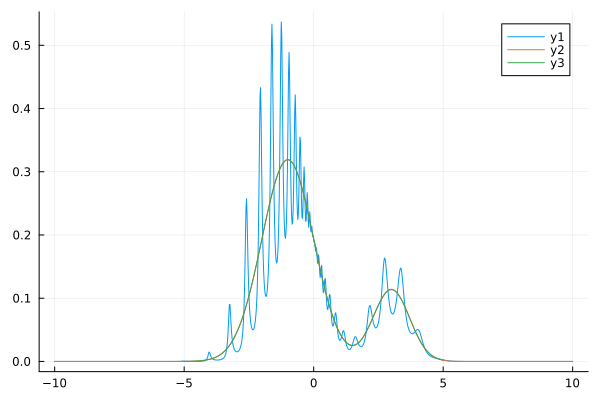

In [10]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [11]:
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
savefig("two_peak.svg")

"/home/kosuke/work/Nevanlinna.jl/notebooks/two_peak.svg"